## Limits of Diversification
Diversification eliminates unrewarded idiosyncratic risks. However, systematic risk cannot be diversified away. Hedging (i.e., avoiding risk taking) is the only effective way to manage systematic risk (i.e., downside risk). Hedging is purely symmetric as investors give up on the upside to limit the downside. Insurance (i.e., dynamic hedging) allows for downside protection without giving up on the upside.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# Loading in the returns, number of firms, and average size of each firm in different industries
ind_return = erk.get_ind_returns()
ind_nfirms = erk.get_ind_nfirms()
ind_size = erk.get_ind_size()

In [3]:
# Calculates the marketcap of each industry for each date
ind_mktcap = ind_nfirms * ind_size
ind_mktcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,655086.88,248864.40,246251.37,359322.24,34986.00,436335.51,291114.00,3101280.74,527004.08,18460.08,...,1194867.48,4823187.60,3246634.04,302188.62,702401.00,329067.65,2282934.94,428784.93,4930872.78,1432052.70
2018-09,650961.36,243994.20,232888.44,369482.88,33346.32,447087.81,305995.50,3233033.92,525412.88,19156.88,...,1229361.27,5069913.20,3562212.72,299831.35,720451.90,340645.57,2486473.99,442374.34,5037628.51,1473543.50
2018-10,638821.15,243073.92,242110.77,366408.00,32533.41,451597.38,309179.15,3288588.12,462370.35,17928.00,...,1250164.08,5043137.32,3546678.80,298376.14,727665.40,330246.60,2500872.76,453366.32,4930387.44,1488960.20
2018-11,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.60,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32


<Axes: >

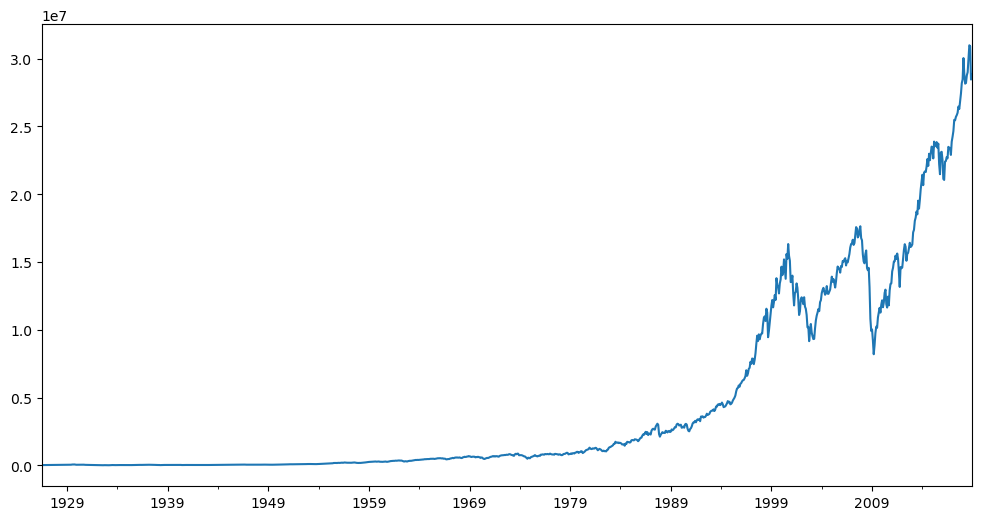

In [4]:
# Calculates the total marketcap of all industries at each date
total_mktcap = ind_mktcap.sum(axis=1)
total_mktcap.plot(figsize=(12, 6))

In [5]:
# Calculating the weights of each industry at each date
ind_capweight = ind_mktcap.divide(total_mktcap, axis=0)
ind_capweight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


In [6]:
# Checking if marketcap weight calculation is correct
ind_capweight.loc['1926'].sum(axis=1)

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

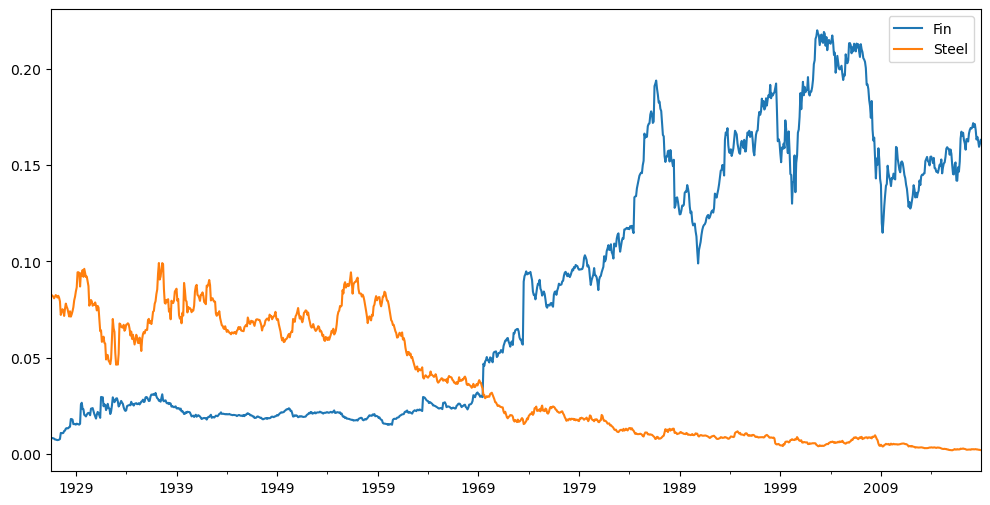

In [7]:
# Plotting the weights of two industries across time for comparison
ind_capweight.loc[:, ['Fin', 'Steel']].plot(figsize=(12, 6))

<Axes: >

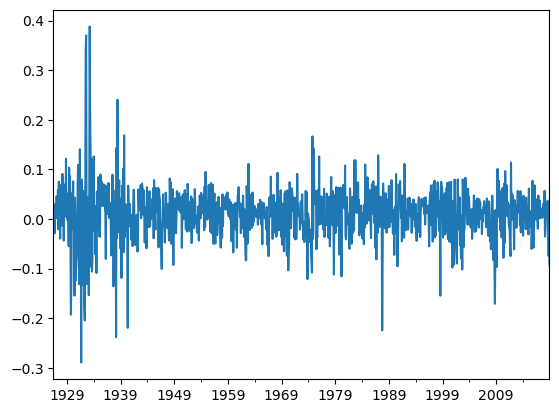

In [8]:
# Calculates total market return for each date
total_market_return = (ind_capweight * ind_return).sum(axis=1)
total_market_return.plot()

<Axes: title={'center': 'Total MarketCap Weighted Index 1926-2018'}>

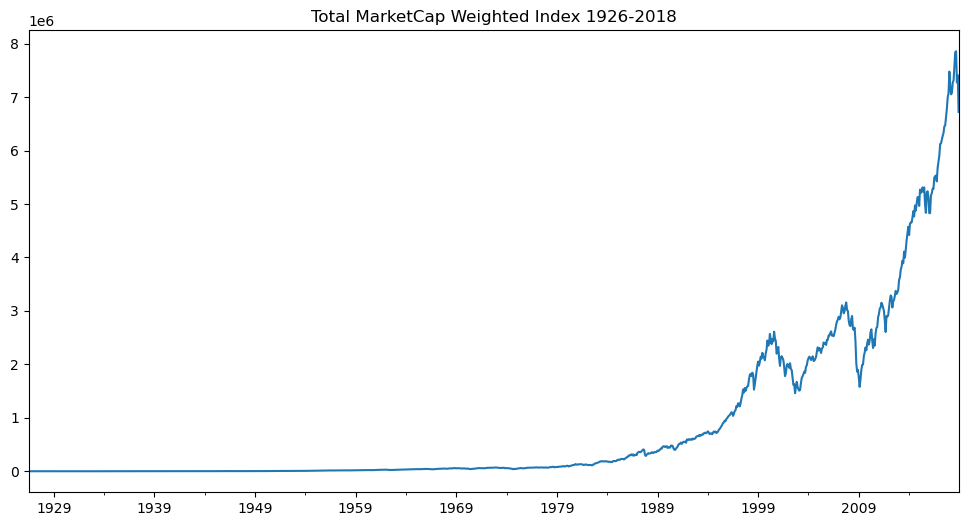

In [9]:
# Creates a wealth index; buy-and-hold investment in the marketcap weighted index
total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(title='Total MarketCap Weighted Index 1926-2018', figsize=(12, 6))

<Axes: >

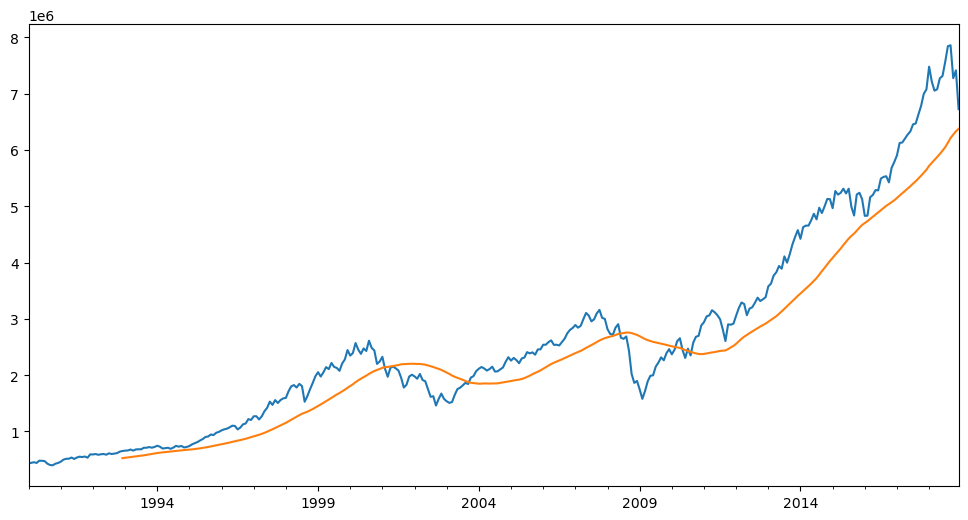

In [10]:
# .rolling() requires a timeseries as an index
total_market_index['1990':].plot(figsize=(12, 6))
total_market_index['1990':].rolling(window=36).mean().plot()

<Axes: >

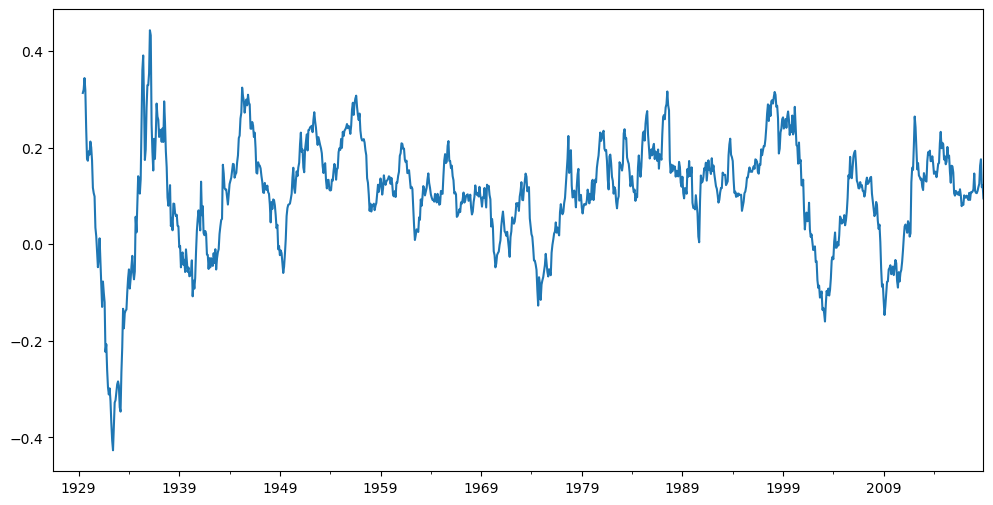

In [11]:
# .aggregate() applied on each window
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36rets.plot(label='Trailing 36 Month Return', figsize=(12, 6))
# total_market_return.plot(label='Returns', legend=True)

## Relationship Between Correlation and Returns

In [12]:
# Calculating correlations between different industries at each date
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [13]:
# Assigning names to the indexes
ts_corr.index.names = ['Date', 'Industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

<Axes: xlabel='Date'>

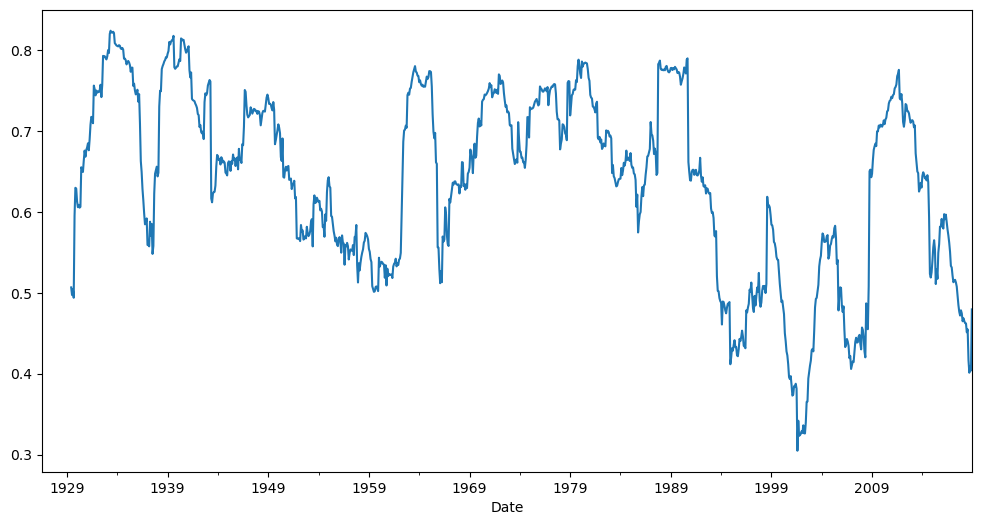

In [14]:
# Calculating the average correlation at each date - how is the average for a matrix/correlation matrix calculated?
ind_tr36corr = ts_corr.groupby(level='Date').apply(lambda cormat: cormat.values.mean())
ind_tr36corr.plot(figsize=(12, 6))

<Axes: >

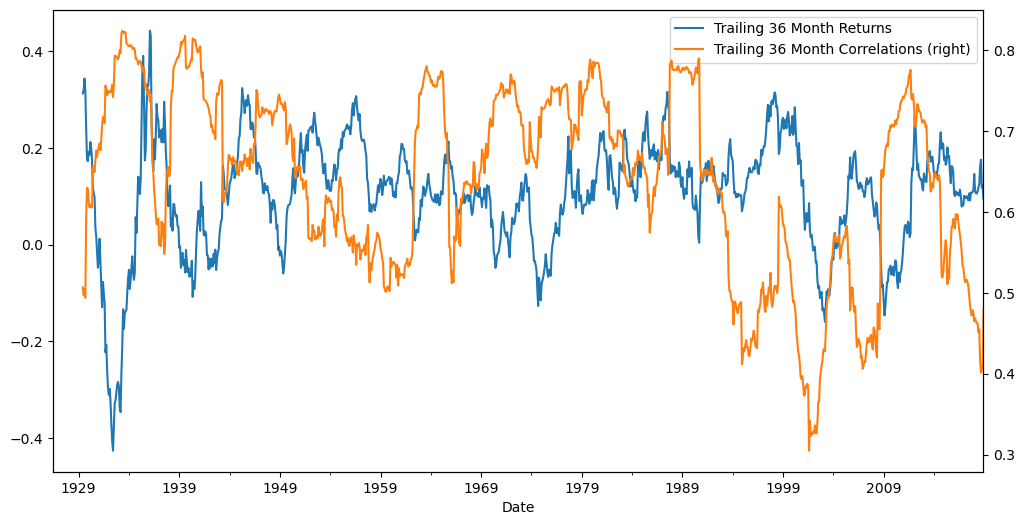

In [15]:
# Comparing trailing 36 month returns to correlation
tmi_tr36rets.plot(label='Trailing 36 Month Returns', figsize=(12, 6), legend=True)
ind_tr36corr.plot(label='Trailing 36 Month Correlations', legend=True, secondary_y=True)

When markets are experiencing a severe downturn, correlations are rising.

<Axes: >

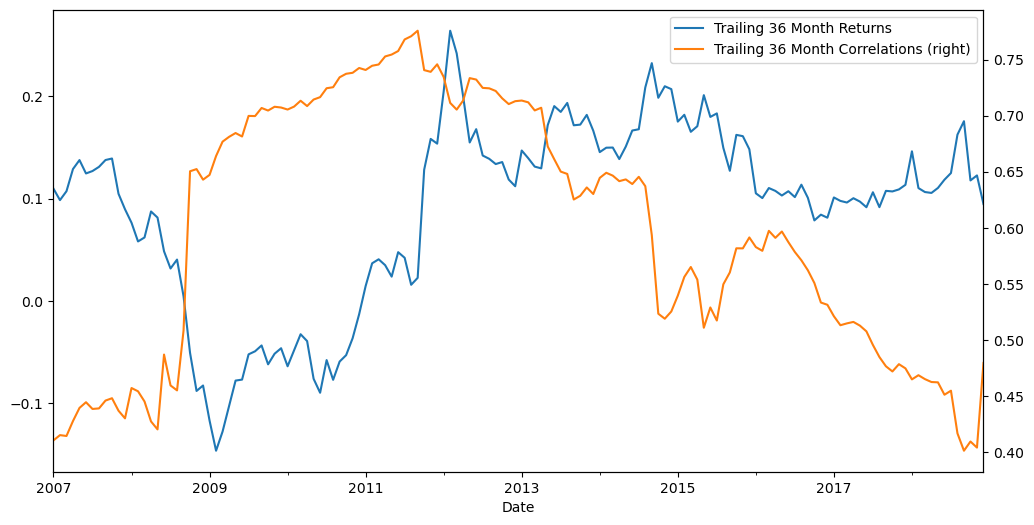

In [16]:
tmi_tr36rets['2007':].plot(label='Trailing 36 Month Returns', figsize=(12, 6), legend=True)
ind_tr36corr['2007':].plot(label='Trailing 36 Month Correlations', legend=True, secondary_y=True)

In [17]:
tmi_tr36rets.corr(ind_tr36corr)

-0.2801006506288399

## Constant Proportion Portfolio Insurance
**Constant Proportion Portfolio Insurance (CPPI)** is an investment strategy designed to provide downside protection while allowing for upside potential. It combines a risky asset (such as stocks) and a risk-free asset (such as bonds or cash) to maintain a desired level of exposure to the risky asset, based on the performance of the portfolio.
- **Cushion Value:** The difference between the current portfolio value and the floor value. The floor value is the minimum acceptable value that the portfolio should not fall below, often set as the present value of a future liability or a minimum wealth level the investor wants to guarantee.
- **Multiplier (M):** A constant factor that determines the exposure to the risky asset. The multiplier magnifies the cushion value to calculate the amount to be invested in the risky asset.
- **Floor Value:** The minimum value that the portfolio should maintain. This is typically calculated as a fixed percentage of the initial investment, ensuring the portfolio value does not drop below a certain level.

For example, if $M=3$ and the wealth preservation floor is at $80\%$, the initial investment in the risky asset is $3\times(\$100-\$80)=\$60$ and $\$40$ in the safe asset. Higher the frequency of trading, more effective the strategy. 

### Gap Risk
**Gap risk** in Constant Proportion Portfolio Insurance (CPPI) refers to the risk that the value of the risky portfolio could fall so sharply and quickly that it breaches the floor value before the portfolio can be rebalanced. This risk materializes if the loss on the risky portfolio relative to the safe portfolio exceeds $\frac{1}{M}$ within the trading interval, where $M$ is the multiplier.
- The risky portfolio's loss exceeding $\frac{1}{M}$ means that the cushion value becomes negative, causing the portfolio value to fall below the floor value.
- If the risky asset drops by more than $\frac{1}{M}$, the loss on the portfolio cannot be compensated by the allocation to the risk-free asset.
- To mitigate gap risk, the multiplier $M$ should be calibrated based on the maximum potential loss within the given trading interval. This calibration involves determining an appropriate $M$ that aligns with the investor's risk tolerance and the expected volatility of the risky asset.

CPPI is a strategy that requires careful calibration of the multiplier and floor value to align with the investor's risk tolerance and investment goals. If the multiplier is too high, the portfolio might be too aggressive; if too low, it might be too conservative. Furthermore, the strategy might not perform well in highly volatile markets where frequent adjustments are needed.

### Maximum Drawdown Constraint
Suitable extensions can accomodate the presence of maximum drawdown constraints

Max Drawdown Constraint:$$V_t>\alpha{M_t}$$
where:
- $V_t$ is the value of the portfolio at time $t$
- $M_t$ is the maximum value of the portfolio between time $0$ and time $t$
- $1-\alpha$ is the maximum acceptable drawdown

### Performance Cap
Given that $E_t$ is the allocation to the risky asset, which is determined based on the current portfolio value $A_t$, floor value $F_t$, threshold value $T_t$, and ceiling value $C_t$. The multiplier $m$ scales the difference between these values to compute $E_t$. 

When $F_t\le{A_t}\le{T_t}$:$${E_t}=m(A_t-F_t)$$
- In this range, the allocation to the risky asset is proportional to the difference between the portfolio value $A_t$, and the floor value $F_t$.

When $T_t\le{A_t}\le{C_t}$:$${E_t}=m(C_t-A_t)$$
- In this range, the allocation to the risky asset is proportional to the difference between the ceiling value $C_t$, and portfolio value $A_t$.

To determine the threshold value $T_t$, use the "smooth-pasting" condition at $A_t=T_t$:
$$A_t=T_t\rightarrow{E_t}=m(T_t-F_t)=m(C_t-T_t)$$

The threshold value appears to be the average of the floor and ceiling value:$$T_t=\frac{F_t+C_t}{2}$$

Beyond the threshold value, the allocation to the risky asset is computed with respect to the ceiling value instead of the floor. This ensures a smooth transition and consistent risk management strategy as the portfolio value crosses different thresholds.

In [18]:
# Loading in industry returns
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()
risky_r = ind_return['2000':][['Steel', 'Fin', 'Beer']]

In [19]:
# Creating a dataframe of risk-free rates with the same shape as the risky returns dataframe
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r[:] = 0.03/12

In [20]:
# Implementing CPPI
start = 1000
floor = 0.8

1. Cushion - (Asset Value - Floor Value)
2. Compute an allocation to Safe and Risky Assets - (M * Cushion (Risk Budget))
3. Recompute the Asset Value based on the returns

In [21]:
dates = risky_r.index
n_steps = len(dates)
account_value = start # initializing account value
floor_value = start * floor
m = 3

# Tracking different values of interest
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m * cushion
    # Limiting allocation to risky asset to 100% (no leverage)
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1 - risky_w
    
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    
    # Updating the account value for each time step
    account_value = risky_alloc*(1 + risky_r.iloc[step]) + safe_alloc*(1 + safe_r.iloc[step])
    
    # Saving the values
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

In [22]:
account_history.head()

,Steel,Fin,Beer
2000-01,984.380000,974.480000,987.320000
2000-02,1023.292876,931.167544,922.971256
2000-03,1047.555176,998.187296,924.835988
2000-04,1042.079009,973.927479,939.993701
2000-05,1007.137753,1001.460033,991.145489


<Axes: >

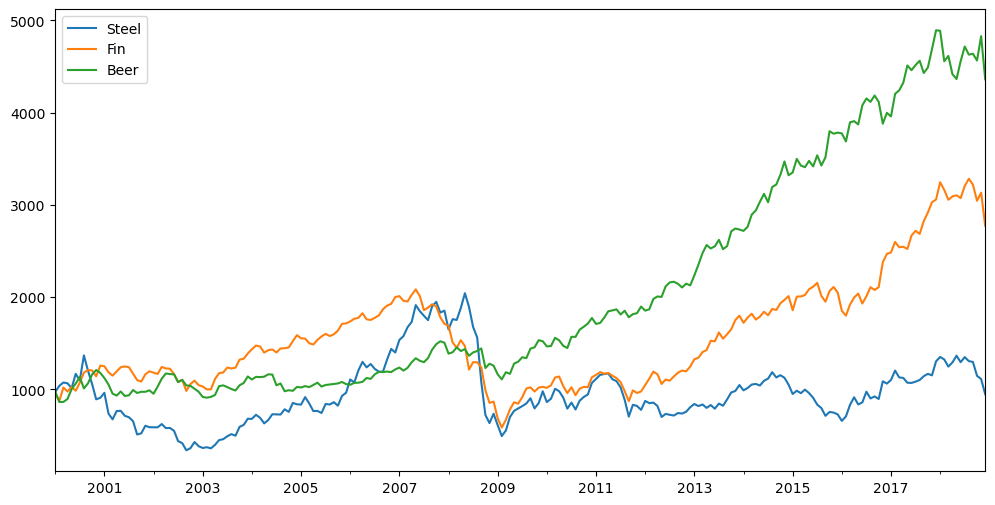

In [23]:
risky_wealth = start*(1 + risky_r).cumprod()
risky_wealth.plot(figsize=(12, 6))

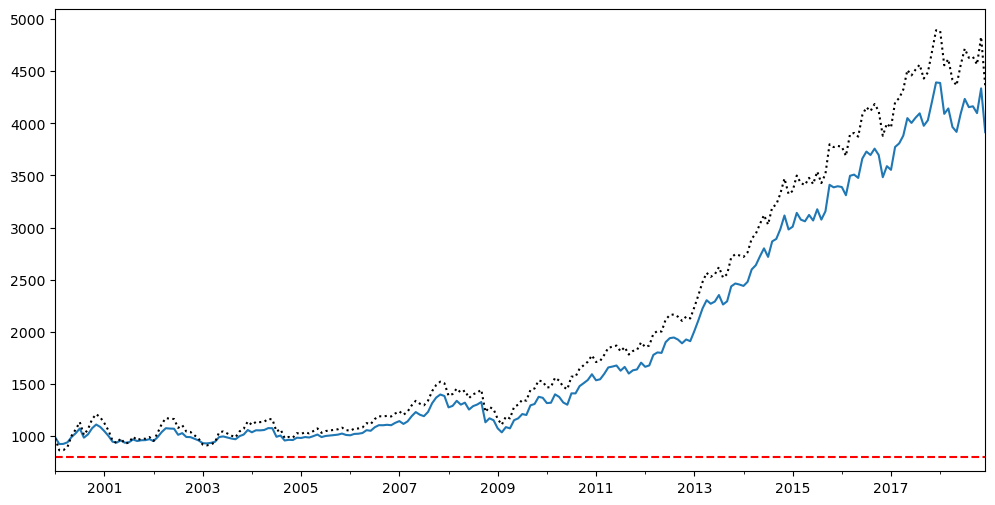

In [24]:
ax = account_history['Beer'].plot(figsize=(12, 6))
risky_wealth['Beer'].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

<Axes: >

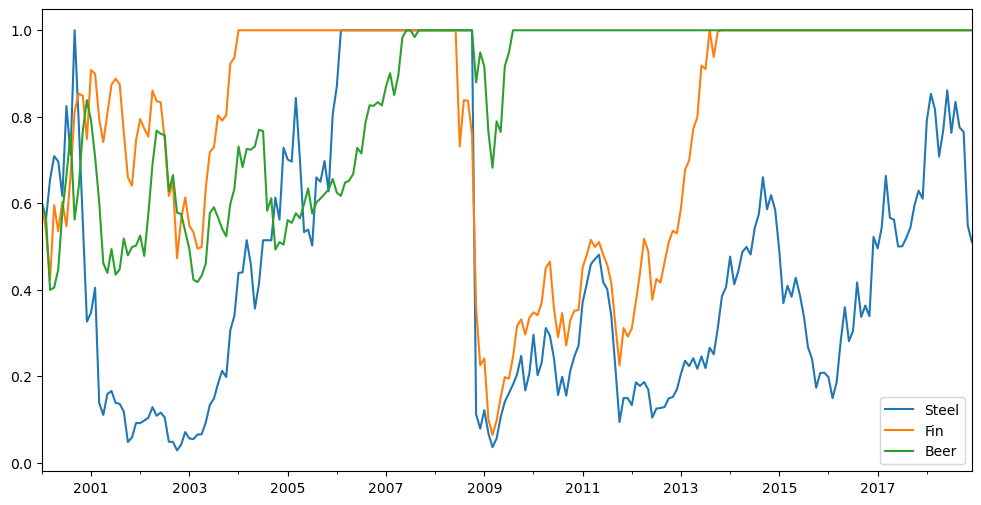

In [25]:
risky_w_history.plot(figsize=(12, 6))

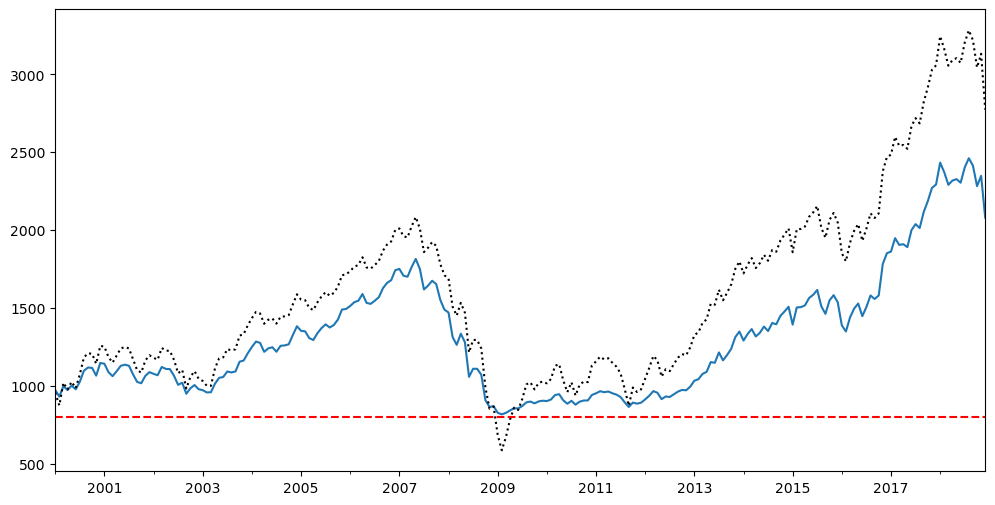

In [26]:
ind = 'Fin'
ax = account_history[ind].plot(figsize=(12, 6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

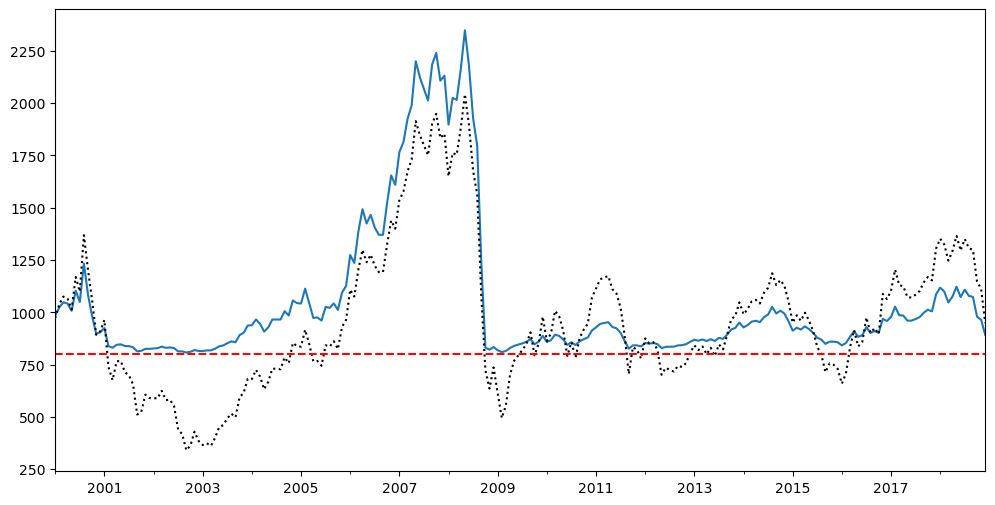

In [27]:
ind = 'Steel'
ax = account_history[ind].plot(figsize=(12, 6))
risky_wealth[ind].plot(ax=ax, style='k:')
ax.axhline(y=floor_value, color='r', linestyle='--')

In [28]:
erk.summary_stats(risky_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.002790,0.312368,-0.326334,4.144381,0.150139,0.208117,-0.102567,-0.758017
Fin,0.055166,0.192909,-0.533218,4.995534,0.091224,0.132175,0.126718,-0.718465
Beer,0.080598,0.138925,-0.493545,4.173881,0.063015,0.091442,0.354314,-0.271368


In [29]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.005167,0.174180,-1.995143,17.110190,0.091995,0.130153,-0.196750,-0.655198
Fin,0.040894,0.131678,-0.946504,6.051414,0.065535,0.091621,0.080352,-0.549673
Beer,0.075544,0.115462,-0.669250,4.760879,0.052923,0.074908,0.383772,-0.259582


<Axes: >

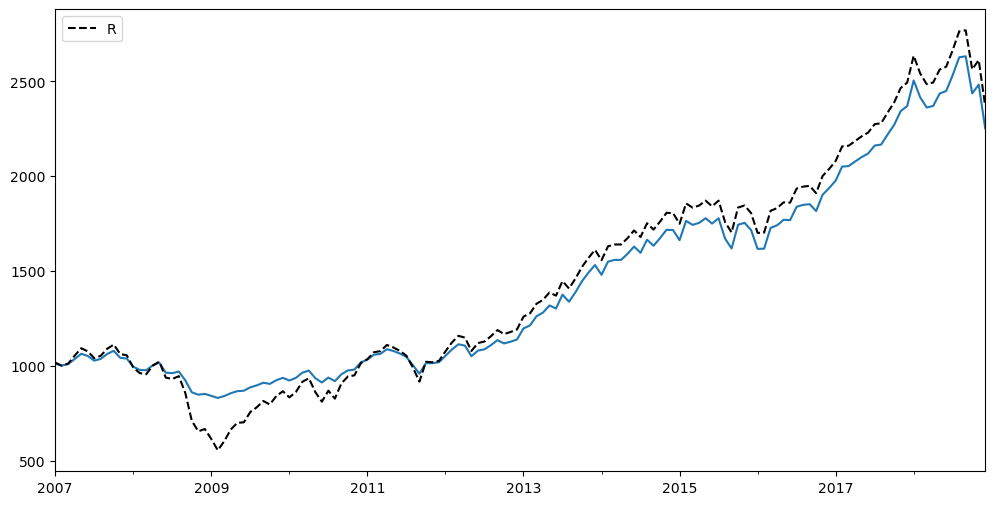

In [30]:
btr = erk.run_cppi(tmi_return['2007':])
ax = btr['Wealth'].plot(figsize=(12, 6), legend=False)
btr['Risky Wealth'].plot(ax=ax, style='k--')

In [31]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.073411,0.150463,-0.734939,4.523488,0.071592,0.096315,0.280618,-0.499943


In [32]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
R,0.069416,0.100381,-0.588292,3.740932,0.045678,0.062953,0.382052,-0.229683


In [33]:
# Implementing maximum drawdown constraint
dates = risky_r.index
n_steps = len(dates)
account_value = start # initializing account value
floor_value = start * floor
m = 3
drawdown = 0.2
peak = account_value

# Tracking different values of interest
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    if drawdown is not None:
        peak = np.maximum(peak, account_value)
        floor_value = peak*(1-drawdown)
    cushion = (account_value - floor_value)/account_value
    risky_w = m * cushion
    # Limiting allocation to risky asset to 100% (no leverage)
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1 - risky_w
    
    risky_alloc = account_value * risky_w
    safe_alloc = account_value * safe_w
    
    # Updating the account value for each time step
    account_value = risky_alloc*(1 + risky_r.iloc[step]) + safe_alloc*(1 + safe_r.iloc[step])
    
    # Saving the values
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value

<Axes: >

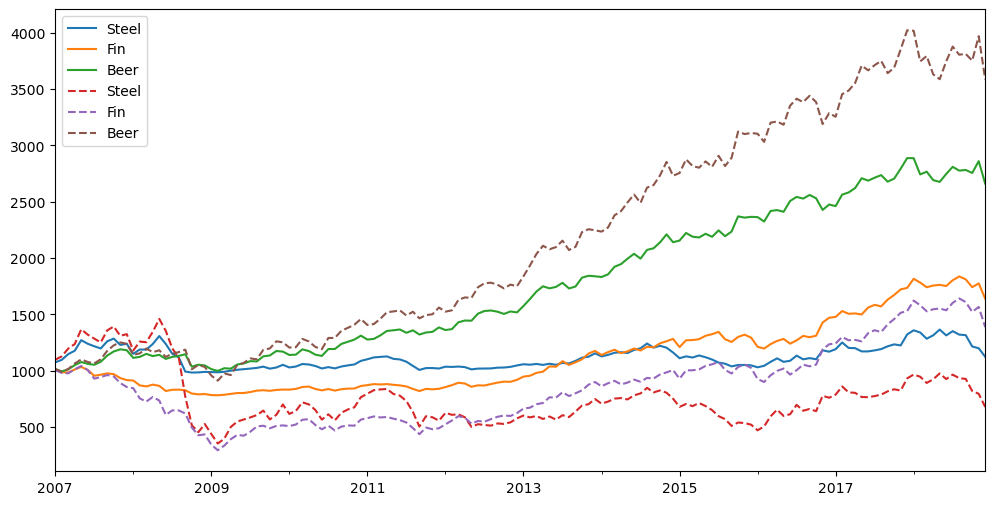

In [34]:
btr = erk.run_cppi(ind_return['2007':][['Steel', 'Fin', 'Beer']], drawdown=0.25)
ax = btr['Wealth'].plot(figsize=(12, 6))
btr['Risky Wealth'].plot(ax=ax, style='--')

In [35]:
erk.summary_stats(btr['Risky Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.459951,4.782828,0.152288,0.203837,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.695200,4.621401,0.105744,0.149862,-0.012370,-0.718465
Beer,0.111554,0.127971,-0.670797,4.650878,0.056497,0.077388,0.620132,-0.271368


In [36]:
erk.summary_stats(btr['Wealth'].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.003784,0.097073,-0.441089,5.220481,0.047371,0.066991,-0.262958,-0.248059
Fin,0.041975,0.085028,-0.355163,4.153860,0.038342,0.054111,0.136964,-0.243626
Beer,0.084375,0.086263,-0.744111,4.571533,0.037937,0.051189,0.613413,-0.161186


## Simulating Asset Returns with Random Walk
### A Stochastic Model for Asset Returns
Stochastic models are not applied for making point estimation rather interval estimation and they use different stochastic processes. The given stochastic differential equation models the return process of an asset:$$\frac{dS_t}{S_t}=(r+\sigma\lambda)dt+\sigma{dW_t}$$
where:
- $S_t$ is the price of the asset at time $t$.
- $\frac{dS_t}{S_t}$ is the instantaneous rate of return on the asset.
- $r$ is the risk-free rate of return.
- $\sigma$ is the volatility of the asset.
- $\lambda$ is the Sharpe Ratio of the asset, a measure of the additional return expected for taking on additional risk.
- $dW_t$ is a Wiener process (or Brownian motion), representing the random component of the asset's returns..


**Interpretation of the Equation:**
1. Deterministic Component $(r+\sigma\lambda)dt$:
    - The term $(r+\sigma\lambda)dt$ represents the deterministic part of the return process.
    - $r$ is the risk-free rate, the return an investor would expect from a risk-free asset.
    - $\sigma\lambda$ is the risk premium, the additional return expected for taking on the risk associated with the asset. $\lambda$ represents the market price of risk, indicating how much additional return is expected per unit of risk $(\sigma)$.

2. Stochastic Component $\sigma{dW_t}$:
    - The term $\sigma{dW_t}$ represents the stochastic or random part of the return process.
    - $\sigma$ is the volatility, scaling the randomness introduced by $dW_t$, a standard Wiener process. $dW_t$ has properties such that $E[dW_t]=0$ and $Var(dW_t)=dt$, reflecting the random fluctuations in asset prices. 

**Solution of the Stochastic Differential Equation (SDE):**

The equation $\frac{dS_t}{S_t}=(r+\sigma\lambda)dt+\sigma{dW_t}$ is a geometric Brownian motion model, commonly used in financial mathematics to describe the dynamics of asset prices. The solution to this SDE can be expressed in terms of $S_t$:$$S_t=S_0exp(r+\sigma\lambda-\frac{1}{2}\sigma^2)t+\sigma{W_t})$$
- **Exponential Growth:** The asset price follows an exponential growth path, influenced by both the deterministic trend and the stochastic variations.
- **Adjustment for Volatility:** The term $-\frac{1}{2}\sigma^2$ accounts for the adjustment in the drift due to the volatility of the asset, ensuring that the solution reflects the actual expected growth rate.

<br><br><br>
### Pricing of a Risk-Free Asset
The given equation and its solution describe the dynamics of a risk-free asset, typically a bond, under continuous compounding:$$\frac{dB_t}{B_t}=rdt$$
where:
- $\frac{dB_t}{B_t}$ represents the relative change (or rate of return) of the bond $B_t$ over a small time interval $d_t$.
- $r$ is the constant risk-free interest rate. It indicates the rate of return of the bond, which is assumed to be risk-free.
- $dt$ is an infinitesimally small time increment.
This differential equation states that the rate of return on the bond is constant and equal to the risk-free rate.

**Solution of the Differential Equation:**

The differential equation $\frac{dB_t}{B_t}=rdt$ describes the instantaneous rate of return of the bond, which is constant and equal to the risk-free rate $r$. The solution ${B_t}=B_0e^{rt}$ shows how the bond value grows exponentially over time at the rate $r$.

## Monte Carlo Simulation with Time-Varying Parameters
### A Model With A Stochastic Opportunity Set
$$\frac{dS_t}{S_t}=(r_t+\sqrt{V_t}\lambda^S_t)dt+\sqrt{V_t}dW^S_t$$

$r$ is a time-varying value itself:$$dr_t=a(b-r_t)dt+\sigma_rdW^r_t$$
where:
- $a$ is the speed of mean reversion
- $b$ is the long-term mean of the process

$V$ can also be modelled as a time-varying value with a slight modification to make sure variance does not turn negative:$$dV_t=\alpha(\bar{V}-V_t)dt+\sigma_V\sqrt{V_t}dW^r_t$$

Asset returns are often assumed to follow a random walk i.e., we assume that asset returns are normally distributed. With **zero serial correlation** and a **variance proportional to time**. We can use the **Brownian Motion** process to construct more complex asset return models with time-varying parameters.

## Random Walk Generation
$$\frac{S_{t+dt}-S_t}{S_t}=\mu{dt}+\sigma\sqrt{dt}\xi_t$$

In [37]:
# n_years is how long
# n_scenarios is how many of them
# steps_per_year is dt
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock's price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year # year/number of steps per year
    n_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios)) # random normal number (Brownian motion)
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0*(1 + rets).cumprod()
    return prices

def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock's price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year # year/number of steps per year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1 + mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [38]:
# Comparing times for a more optimized function
# %timeit gbm0(n_years=5, n_scenarios=1000)

In [39]:
# %timeit gbm1(n_years=5, n_scenarios=1000)

Discretization error arises due to the approximation of continuous processes using discrete time steps. In financial models, it is crucial to minimize this error to ensure accurate simulations. Discretization error in this context can be introduced by:
- **Time Step Size $(dt)$:** Larger time steps increase discretization error.
- **Approximation of Continuous Processes:** Approximating the continuous drift and diffusion terms using discrete steps.

Instead of using `mu * dt`, use `loc=(1 + mu)**dt`. This adjustment is intended to account for the compounding effect more accurately. However, this still introduces some approximation. The standard approach is: `loc=mu * dt` and the adjustment term: `- 0.5 * sigma**2 * dt` which accounts for the correction due to volatility (Ito's Lemma).

By correctly adjusting the drift term to account for volatility, the improved function reduces discretization error, providing a more accurate simulation of the GBM process. Using smaller time steps (higher steps_per_year) can further reduce discretization error, but at the cost of increased computational effort. Balancing accuracy and computational efficiency is key in numerical simulations.

In [40]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock's price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year # year/number of steps per year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1 + mu)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [41]:
p = gbm(10, n_scenarios=3)
p

,0,1,2
0,100.000000,100.000000,100.000000
1,108.135532,95.947431,104.719295
2,107.285762,96.754184,99.930320
3,104.675594,91.934109,105.473041
4,96.768136,86.969584,101.536433
...,...,...,...
115,245.617424,75.410679,163.505388
116,242.852478,75.206750,169.550242
117,249.856994,71.113563,167.142667
118,260.155053,70.995269,169.770534


<Axes: >

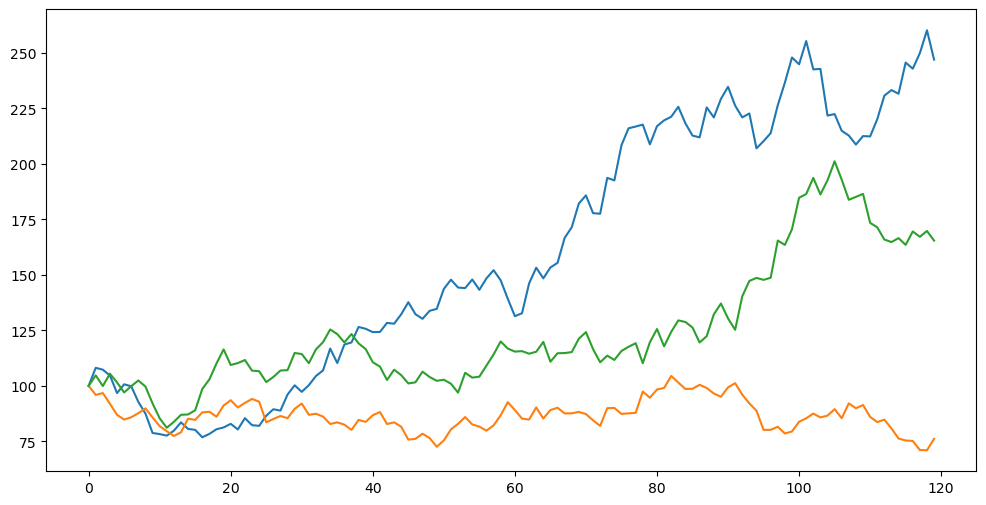

In [42]:
p.plot(figsize=(12, 6), legend=False)

In [43]:
p = gbm(10, n_scenarios=1000)

<Axes: >

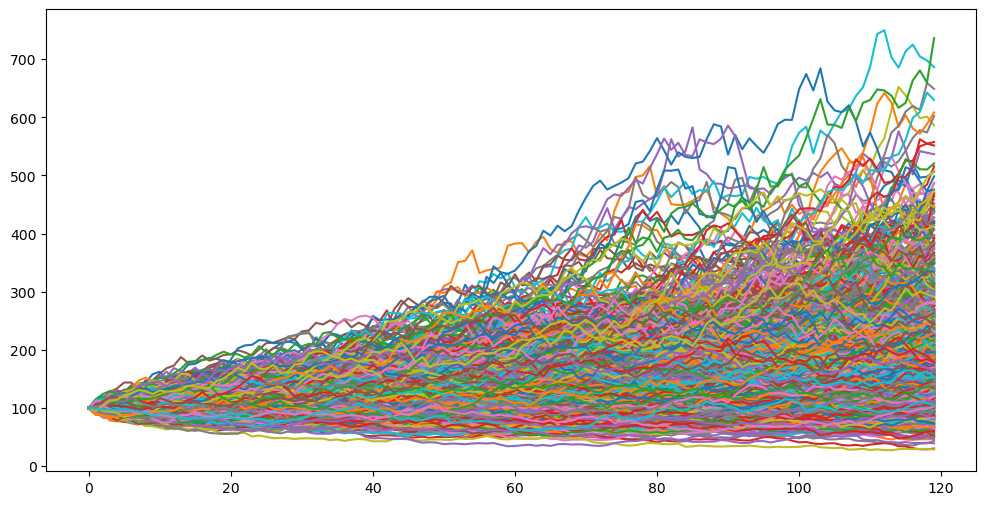

In [44]:
p.plot(figsize=(12, 6), legend=False)

## Interactive Plots of Monte Carlo Simulations of CPPI and GBM

In [45]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5, linewidth=2, figsize=(12, 6))
    ax.axhline(y=100, ls=':', color='black')
    ax.set_ylim(top=400)
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

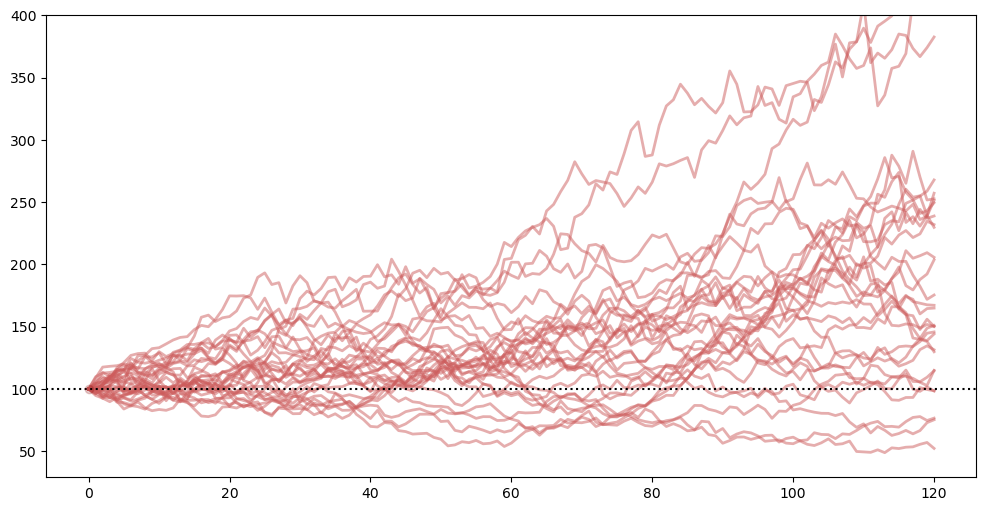

In [46]:
show_gbm(30, 0.07, 0.15)

In [47]:
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=(1, 20, 1),
                                   mu=(-0.2, 0.2, 0.01),
                                   sigma=(0, 0.3, 0.01)
                                  )

In [48]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

In [49]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

### Example Scenario
Let's assume the following scenario:
- We run a Monte Carlo simulation of CPPI with 50 scenarios.
- The initial wealth (start) is $\$100$.
- The maximum wealth observed in all scenarios is $\$200$.
- The `y_max` slider value is set to 50.

`wealth.values.max()` returns the maximum wealth across all scenarios, which is $\$200$ in this case. The `y_max` value is 50, as set by the user via the slider. The scaled maximum wealth is calculated as:$$scaled\;max\;wealth=wealth.values.max()\times\frac{y_{max}}{100}=200\times\frac{50}{100}=100$$
The upper limit of the y-axis is set to the scaled maximum wealth, which is $\$100$.

When the function runs, it will produce a plot with the y-axis limited to $\$100$, even though the maximum wealth observed in the simulation is $\$200$. This helps in zooming into the plot to observe the wealth trajectories more closely within the specified range.

In [50]:
cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)

In [51]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Low-volatility assets seem to be favoured more by CPPI.

### Adding a Histogram and Reporting Floor Violations

In [52]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")

In [53]:
cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)

In [54]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### Adding Terminal Wealth Statistics

In [55]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor) # returns a boolean array
    n_failures = failure_mask.sum() # number of Trues in a boolen array
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=24)

In [56]:
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)

In [57]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…